In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pylab import rcParams

In [2]:
data = pd.read_csv('./Data/한국가스공사_시간별 공급량_20181231.csv', encoding = 'euc-kr').dropna()

In [3]:
data.head()

,연월일,시간,구분,공급량
0,2013-01-01,1,A,2497.129
1,2013-01-01,2,A,2363.265
2,2013-01-01,3,A,2258.505
3,2013-01-01,4,A,2243.969
4,2013-01-01,5,A,2344.105


In [4]:
data['연월일'] = pd.to_datetime(data['연월일'])

In [5]:
data.shape

(368088, 4)

In [6]:
data['year']  = data['연월일'].dt.year
data['month'] = data['연월일'].dt.month
data['day']   = data['연월일'].dt.day

In [7]:
data.iloc[-10:]

,연월일,시간,구분,공급량,year,month,day
368078,2018-12-31,15,H,525.488,2018,12,31
368079,2018-12-31,16,H,518.009,2018,12,31
368080,2018-12-31,17,H,542.360,2018,12,31
368081,2018-12-31,18,H,603.138,2018,12,31
368082,2018-12-31,19,H,678.975,2018,12,31
368083,2018-12-31,20,H,681.033,2018,12,31
368084,2018-12-31,21,H,669.961,2018,12,31
368085,2018-12-31,22,H,657.941,2018,12,31
368086,2018-12-31,23,H,610.953,2018,12,31
368087,2018-12-31,24,H,560.896,2018,12,31


In [8]:
data['구분'].value_counts()

A    52584
B    52584
C    52584
D    52584
E    52584
G    52584
H    52584
Name: 구분, dtype: int64

In [9]:
suppliers = ['A', 'B', 'C', 'D', 'E', 'G', 'H']
datas = dict()

for supplier in suppliers:
    datas['data_{}'.format(supplier)] = (data[data['구분'] == supplier].reset_index(drop=True))

In [10]:
for data in datas.values():
    print(data.shape)

(52584, 7)
(52584, 7)
(52584, 7)
(52584, 7)
(52584, 7)
(52584, 7)
(52584, 7)


In [11]:
months = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

# checking if the number of days add up to 365
total = 0
for i in months:
    total += i
    
total

365

In [12]:
# vertical lines for indicating the end of each month
index = 0
vertical_coords = []

for i in months:
    index += i
    vertical_coords.append(index)
    
vertical_coords

[31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365]

In [ ]:
#plt.figure(figsize = (10,6))

for data in datas.values():
    rcParams['figure.figsize'] = 20, 10
    fig = plt.figure()

    ax1 = fig.add_subplot(231)
    ax2 = fig.add_subplot(232)
    ax3 = fig.add_subplot(233)
    ax4 = fig.add_subplot(234)
    ax5 = fig.add_subplot(235)
    ax6 = fig.add_subplot(236)

    axes = [ax1, ax2, ax3, ax4, ax5, ax6]

    for ax in axes:
        for vc in vertical_coords:
            ax.axvline(vc*24, linewidth=2, color="r")
    
    plotted_datas = []
    years = [2013, 2014, 2015, 2016, 2017, 2018]
    
    for year in years:
        plotted_datas.append(data[data['year'] == year].reset_index(drop=True))
    
    
    i = 0
    while i < len(axes):
        axes[i].plot(plotted_datas[i]['공급량'])
        axes[i].set_ylim(( 0, data['공급량'].max() + 500 ))
        axes[i].set_title("Supplier "+ str(plotted_datas[i]['구분'][0])+ " " + str(plotted_datas[i]['year'][0]))
        i += 1

    #plt.savefig('./Graphs/supplier{}.png'.format(str(plotted_datas[0]['구분'][0])), dpi=100)


In [ ]:
'''
# saving data for each supplier
for k,v in datas.items():
    filepath = './Data/supplier_{}.csv'.format(k[-1])
    v.to_csv(filepath)
'''

In [ ]:
test_data = pd.read_csv('./Submission/test.csv')

In [ ]:
test_data['구분'] = test_data['일자|시간|구분'].str[-1]
test_data['연월일'] = pd.to_datetime(test_data['일자|시간|구분'].str[:-5])
test_data['시간'] = test_data['일자|시간|구분'].str[-4:-2].astype(np.float32)

test_data['year']  = test_data['연월일'].dt.year
test_data['month'] = test_data['연월일'].dt.month
test_data['day']   = test_data['연월일'].dt.day

In [ ]:
test_data.head()

In [ ]:
test_data.shape

test_data['구분'].value_counts()

print(test_data.iloc[2160-5:2160])
print(test_data.iloc[2160:2160+5]['구분'])
print(test_data.iloc[2160*2:2160*2+5]['구분'])
print(test_data.iloc[2160*3:2160*3+5]['구분'])
print(test_data.iloc[2160*4:2160*4+5]['구분'])
print(test_data.iloc[2160*5:2160*5+5]['구분'])
print(test_data.iloc[2160*6:2160*6+5]['구분'])

In [13]:
training_A_12  = datas['data_A'][ (datas['data_A']['month'] == 12) & \
                                  (datas['data_A']['year'].isin([2013, 2014, 2015,2016, 2017])) ].reset_index(drop = True)
training_A_1_3 = datas['data_A'][ (datas['data_A']['month'].isin([1,2,3])) & \
                                  (datas['data_A']['year'].isin([2014, 2015, 2016, 2017, 2018])) ].reset_index(drop = True)
training_A = pd.concat([training_A_12, training_A_1_3], axis = 0).reset_index(drop=True)
training_A = training_A.sort_values(['year', 'month']).reset_index(drop=True)

In [14]:
training_A.shape

print(training_A[(training_A['year'] == 2014) & (training_A['month'] == 3) &\
            (training_A['day'] == 31) & (training_A['시간'] == 24)]) # 2903
print(training_A[(training_A['year'] == 2015) & (training_A['month'] == 3) &\
            (training_A['day'] == 31) & (training_A['시간'] == 24)]) # 5807
print(training_A[(training_A['year'] == 2016) & (training_A['month'] == 3) &\
            (training_A['day'] == 31) & (training_A['시간'] == 24)]) # 8735
print(training_A[(training_A['year'] == 2017) & (training_A['month'] == 3) &\
            (training_A['day'] == 31) & (training_A['시간'] == 24)]) # 11639
print(training_A[(training_A['year'] == 2018) & (training_A['month'] == 3) &\
            (training_A['day'] == 31) & (training_A['시간'] == 24)]) # 14543



print(training_A.iloc[5808])

indices = [2903, 5807, 8735, 11639, 14543]

training_A_sep = []

last_idx = 0
for idx in indices:
    idx = idx + 1 if idx != training_A.shape[0] -1 else idx
    training_A_sep.append(training_A[last_idx:idx][['공급량', 'year', 'month', 'day', '시간']])
    last_idx = idx+1

# need to make it into 12 ~ 3, 12 ~ 3 

            연월일  시간 구분      공급량  year  month  day
2903 2014-03-31  24  A  894.665  2014      3   31
            연월일  시간 구분       공급량  year  month  day
5807 2015-03-31  24  A  1027.969  2015      3   31
            연월일  시간 구분       공급량  year  month  day
8735 2016-03-31  24  A  1024.705  2016      3   31
             연월일  시간 구분       공급량  year  month  day
11639 2017-03-31  24  A  1283.609  2017      3   31
             연월일  시간 구분      공급량  year  month  day
14543 2018-03-31  24  A  784.105  2018      3   31
연월일      2015-12-01 00:00:00
시간                         1
구분                         A
공급량                 1511.977
year                    2015
month                     12
day                        1
Name: 5808, dtype: object


<AxesSubplot:>

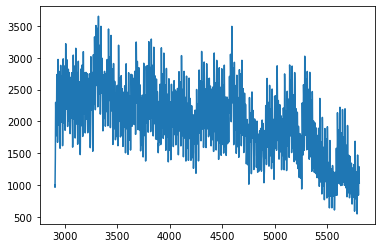

In [15]:
# use 12, 1, 2, 3
# and use past 30 days as input
    
training_A_sep[1]['공급량'].plot()

In [16]:
# change pandas dataframe to numpy ndarray
for i in range(len(training_A_sep)):
    training_A_sep[i] = training_A_sep[i].values

In [17]:
training_A_sep[0].shape # 2013 to 2014
training_A_sep[0][-2:]

print(training_A_sep[0][:,[0]].shape)

(2904, 1)


In [18]:
from sklearn.preprocessing import MinMaxScaler

x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

x_scaler.fit(training_A_sep[0])
y_scaler.fit(training_A_sep[0][:, [0]])

x_norm = x_scaler.transform(training_A_sep[0])
y_norm = y_scaler.transform(training_A_sep[0][:, [0]])

In [19]:
def create_LSTM_Input(data, seq_length, step_size):
    final_data = np.zeros((data.shape[0]-seq_length, int(seq_length/step_size), data.shape[1]))

    length = data.shape[0]

    for i in range(final_data.shape[0]):
        final_data[i] = data[i:i+seq_length:step_size]

    return final_data

def create_LSTM_Output(data, seq_length):
    final_output = []
    length = data.shape[0]
    
    for i in range(seq_length, length):
        final_output.append(data[i])
    
    final_output = np.array(final_output)
    #final_output = np.expand_dims(final_output, axis = 1)
    
    return final_output
        

In [20]:
lstm_input = create_LSTM_Input(x_norm, 24, 1)
lstm_output = create_LSTM_Output(y_norm, 24)

x_norm[-2:]

array([[0.17395912, 1.        , 0.18181818, 1.        , 0.95652174],
       [0.15870425, 1.        , 0.18181818, 1.        , 1.        ]])

In [21]:
print(lstm_input.shape)
print(lstm_output.shape)
print(lstm_input[-2:])
print(lstm_output[-1])

(2880, 24, 5)
(2880, 1)
[[[0.13112771 1.         0.18181818 0.96666667 0.95652174]
  [0.11834573 1.         0.18181818 0.96666667 1.        ]
  [0.07566687 1.         0.18181818 1.         0.        ]
  [0.01647527 1.         0.18181818 1.         0.04347826]
  [0.         1.         0.18181818 1.         0.08695652]
  [0.01537263 1.         0.18181818 1.         0.13043478]
  [0.06646041 1.         0.18181818 1.         0.17391304]
  [0.10546205 1.         0.18181818 1.         0.2173913 ]
  [0.20672232 1.         0.18181818 1.         0.26086957]
  [0.31091045 1.         0.18181818 1.         0.30434783]
  [0.24317077 1.         0.18181818 1.         0.34782609]
  [0.20500413 1.         0.18181818 1.         0.39130435]
  [0.2049747  1.         0.18181818 1.         0.43478261]
  [0.17911366 1.         0.18181818 1.         0.47826087]
  [0.1814581  1.         0.18181818 1.         0.52173913]
  [0.14592494 1.         0.18181818 1.         0.56521739]
  [0.1132233  1.         0.18181

In [22]:
from sklearn.model_selection import train_test_split

train_x, valid_x, train_y, valid_y = train_test_split(lstm_input, lstm_output, test_size = 0.2, random_state = 1311, shuffle=True)


In [23]:
import tensorflow as tf

from tensorflow.keras.layers import Reshape, Dense, Input, LSTM, Flatten, Concatenate, Bidirectional, BatchNormalization, Dropout, ReLU, Activation, ConvLSTM2D, RepeatVector
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

Init Plugin
Init Graph Optimizer
Init Kernel


In [27]:
input_x = Input(shape=(24,5)) #(sequence length, num of features) for LSTM; i.e. 50 minutes (sequence of 50 minutes)

x = Bidirectional(LSTM(20, return_sequences=True))(input_x)
x = BatchNormalization()(x)
x = Activation('tanh')(x)

x = Bidirectional(LSTM(10, return_sequences=True))(x)
x = BatchNormalization()(x)
x = Activation('tanh')(x)

x = Flatten()(x)

x = Dense(32)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

output = Dense(1)(x)


model = Model(inputs = input_x, outputs = output)
model.compile(loss="mean_absolute_error", optimizer = Adam(lr=0.001)) 
model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 24, 5)]           0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 24, 40)            4160      
_________________________________________________________________
batch_normalization_3 (Batch (None, 24, 40)            160       
_________________________________________________________________
activation_3 (Activation)    (None, 24, 40)            0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 24, 20)            4080      
_________________________________________________________________
batch_normalization_4 (Batch (None, 24, 20)            80        
_________________________________________________________________
activation_4 (Activation)    (None, 24, 20)            0   

In [ ]:
hist = model.fit(train_x, train_y, batch_size = 128, epochs =30, validation_data = (valid_x, valid_y))

Epoch 1/30


2021-10-18 22:00:29.065816: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-18 22:00:29.352712: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-18 22:00:29.352730: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-18 22:00:29.539779: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-18 22:00:29.551486: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-18 22:00:29.746716: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-18 22:00:29.749387: I tensorflow/core/grappler/optimizers/cust

18/18 [==============================] - ETA: 0s - loss: 0.6161

2021-10-18 22:00:32.643701: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-18 22:00:32.745216: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-18 22:00:32.754473: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-18 22:00:32.927495: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-18 22:00:32.936822: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 6s 196ms/step - loss: 0.6161 - val_loss: 0.4082
Epoch 2/30
18/18 [==============================] - 2s 130ms/step - loss: 0.2286 - val_loss: 0.2612
Epoch 3/30
18/18 [==============================] - 2s 129ms/step - loss: 0.1268 - val_loss: 0.2452
Epoch 4/30
18/18 [==============================] - 2s 131ms/step - loss: 0.0918 - val_loss: 0.2865
Epoch 5/30
18/18 [==============================] - 2s 130ms/step - loss: 0.0901 - val_loss: 0.3546
Epoch 6/30
18/18 [==============================] - 2s 135ms/step - loss: 0.0817 - val_loss: 0.3963
Epoch 7/30
18/18 [==============================] - 2s 129ms/step - loss: 0.0717 - val_loss: 0.4026
Epoch 8/30
18/18 [==============================] - 2s 131ms/step - loss: 0.0670 - val_loss: 0.4391
Epoch 9/30
18/18 [==============================] - 2s 131ms/step - loss: 0.0604 - val_loss: 0.4486
Epoch 10/30
18/18 [==============================] - 2s 136ms/step - loss: 0.0599 - val_loss: 0.4457
Epoch 11/3